In [1]:
# Cell 1: Uninstall conflicting packages
!pip uninstall -y numpy scipy pandas pystan statsmodels


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: scipy 1.13.1
Uninstalling scipy-1.13.1:
  Successfully uninstalled scipy-1.13.1
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
Found existing installation: statsmodels 0.14.4
Uninstalling statsmodels-0.14.4:
  Successfully uninstalled statsmodels-0.14.4


In [24]:
# Cell 2: Install specific versions of dependencies
!pip install numpy==1.21.6 scipy==1.7.3 pandas==1.3.5 pystan==2.19.1.1 statsmodels==0.12.2

# Install cmdstanpy and NeuralProphet (avoiding Kats and fbprophet)
!pip install cmdstanpy==0.9.5
!pip install neuralprophet
!pip install darts
# Cell 2: Install necessary dependencies
!pip install darts[all]
!pip install neuralprophet


  Using cached numpy-1.21.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached scipy-1.7.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.2 kB)
  Using cached pandas-1.3.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (12 kB)
  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  Using cached statsmodels-0.12.2.tar.gz (17.5 MB)
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [3]:
# Cell 3: Restart the runtime
# IMPORTANT: After running the above cells, restart the runtime manually
# from the menu (Runtime > Restart runtime), or use the following code to restart programmatically:
# import os
# os._exit(0)

In [4]:
# Cell 4: Mount Google Drive
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Cell 5: Define the path to the data file
data_path = '/content/drive/Shareddrives/🧱Lemay.ai➜Indro Leons/Data/2. DATA/DATA/Drone Project - Written Sales by Store, Vendor, Major, Minor & Sku - Historical View.xlsm'

# Load the data from the "Written" sheet into a DataFrame
df = pd.read_excel(data_path, sheet_name='Written')

df.head()  # Check the first few rows of the DataFrame


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Period,Buyer,Vendor,Product,Major,Minor,Category,Written Date,Order Type,Type,...,P/D Store,P/D Address,P/D City,P/D Province,P/D Postal Code,Filled Store,Filled Address,Filled City,Filled Province,Filled Postal Code
0,OCT-2022,S,004F,1FURN,100A,2004F,1.0,2022-10-01,CRM,WRIT_SALES,...,NW,25 HARRY WALKER PKWY N. (905)953-1617,NEWMARKET,ON,L3Y 7B3,NW,25 HARRY WALKER PKWY N. (905)953-1617,NEWMARKET,ON,L3Y 7B3
1,OCT-2022,S,004F,1FURN,100A,2004F,1.0,2022-10-01,CRM,WRIT_SALES,...,NW,25 HARRY WALKER PKWY N. (905)953-1617,NEWMARKET,ON,L3Y 7B3,NW,25 HARRY WALKER PKWY N. (905)953-1617,NEWMARKET,ON,L3Y 7B3
2,OCT-2022,S,004F,1FURN,100A,2004F,1.0,2022-10-01,MCR,WRIT_SALES,...,ED,13730-140TH STREET (780)456-4455,EDMONTON,AB,T6V 1J8,NaN,NaN,NaN,NaN,NaN
3,OCT-2022,S,004F,1FURN,100A,2004F,1.0,2022-10-01,SAL,PARTIAL VOIDS,...,NS,140 AKERLEY BLVD. (902)468-5201,DARTMOUTH,NS,B3B 2E4,NaN,NaN,NaN,NaN,NaN
4,OCT-2022,S,004F,1FURN,100A,2004F,1.0,2022-10-01,SAL,WRIT_SALES,...,CA,6825-11TH STREET S.E. (403)253-0191,CALGARY,AB,T2H 2S1,CA,6825-11TH STREET S.E. (403)253-0191,CALGARY,AB,T2H 2S1


In [19]:
# Cell 6: Prepare the data
# Verify the column names
print("Columns in DataFrame:", df.columns)

# Adjust column names to match your dataset
df = df.rename(columns={"<Written Date Column>": "time", "<Sales Column>": "value"})

# Ensure 'time' column is in datetime format
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Filter only the necessary columns and drop rows with missing or duplicate values
df = df[['time', 'value']].dropna().drop_duplicates()

# Check for duplicate timestamps
if df['time'].duplicated().any():
    print("Warning: Duplicate timestamps detected. Aggregating data...")
    df = df.groupby('time', as_index=False).sum()  # Aggregate duplicate timestamps by summing values

# Ensure the data is sorted by time
df = df.sort_values(by='time')

print("Prepared DataFrame:")
print(df.head())  # Display the formatted data


Columns in DataFrame: Index(['time', 'value'], dtype='object')
Prepared DataFrame:
        time        value
0 2022-10-01  11922954.86
1 2022-10-02         0.00
2 2022-10-03         0.00
3 2022-10-04         0.00
4 2022-10-05         0.00


In [25]:
# Cell 7: Create a model using Darts
from darts.models import NBEATSModel, ARIMA, ExponentialSmoothing, Prophet
from darts.metrics import mae
from darts import TimeSeries

# Convert DataFrame to Darts TimeSeries
time_series = TimeSeries.from_dataframe(df, 'time', 'value')

# Split data into training and validation sets
train, val = time_series.split_before(0.8)

# Define models to evaluate
models = {
    "N-BEATS": NBEATSModel(input_chunk_length=30, output_chunk_length=7, n_epochs=100),
    "ARIMA": ARIMA(),
    "Exponential Smoothing": ExponentialSmoothing(),
    "Prophet": Prophet()
}

# Train and evaluate each model
mae_scores = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(train)
    predictions = model.predict(len(val))
    mae_scores[name] = mae(val, predictions)

# Print results
for name, score in mae_scores.items():
    print(f"{name} MAE: {score}")

# Identify the best model
best_model_name = min(mae_scores, key=mae_scores.get)
print(f"\nBest model: {best_model_name}")
best_model = models[best_model_name]


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 6.2 M  | train
-------------------------------------------------------------
6.2 M     Trainable params
1.5 K     Non-trainable params
6.2 M     Total params
24.972    Total estimated model params size (MB)
396       Modules in train mode
0         Modules in eval mode


Training N-BEATS...


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Training ARIMA...


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Training Exponential Smoothing...
Training Prophet...
N-BEATS MAE: 518355.039350696
ARIMA MAE: 684636.3900430576
Exponential Smoothing MAE: 885066.3551184495
Prophet MAE: 786514.2046682882

Best model: N-BEATS


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

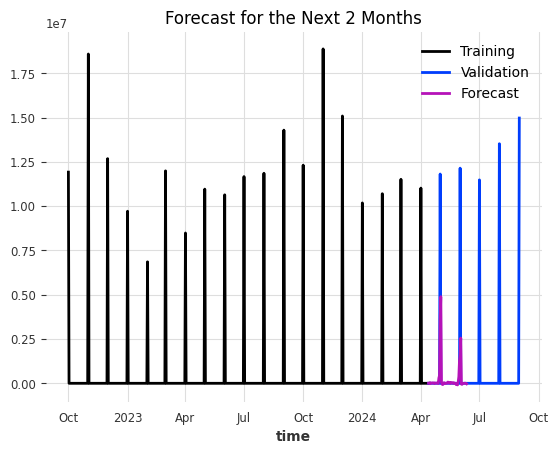

In [26]:
# Cell 8: Forecast the next 2 months with the best model
forecast = best_model.predict(n=60)  # Predict the next 60 time steps

# Plot the results
import matplotlib.pyplot as plt
train.plot(label="Training")
val.plot(label="Validation")
forecast.plot(label="Forecast")
plt.title("Forecast for the Next 2 Months")
plt.legend()
plt.show()


In [27]:
# Cell 9: Evaluate the model
# Evaluate the best model on the validation set
mae_best_model = mae(val, best_model.predict(len(val)))
print(f"Best Model ({best_model_name}) MAE: {mae_best_model}")

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

Best Model (N-BEATS) MAE: 518355.039350696


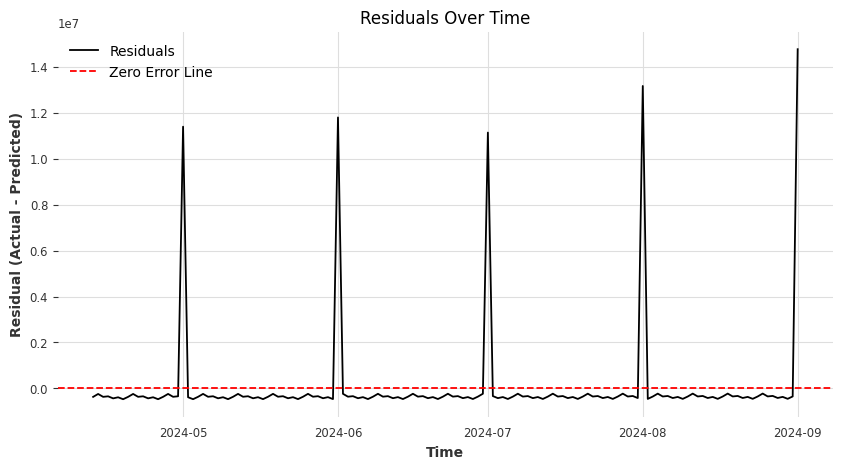

In [28]:
# Plotting residuals (actual - predicted) over time
residuals = val.values() - model.predict(len(val)).values()

plt.figure(figsize=(10, 5))
plt.plot(val.time_index, residuals, label="Residuals")
plt.axhline(0, color="red", linestyle="--", label="Zero Error Line")
plt.title("Residuals Over Time")
plt.xlabel("Time")
plt.ylabel("Residual (Actual - Predicted)")
plt.legend()
plt.show()


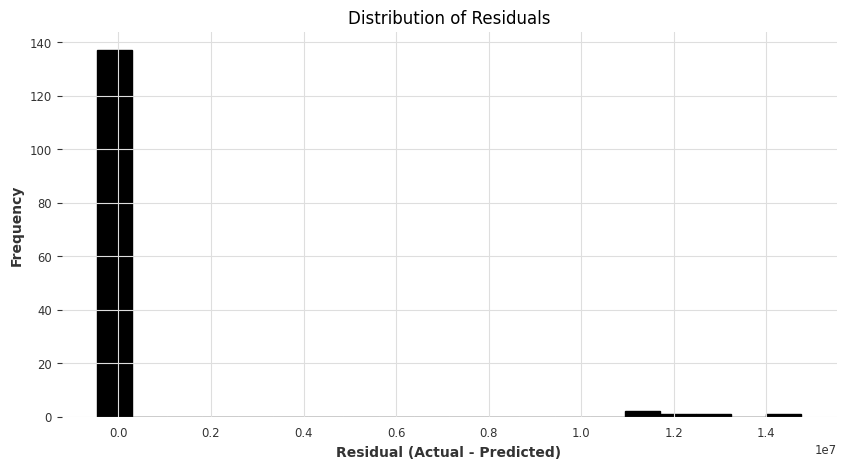

In [29]:
# Plotting histogram of residuals
plt.figure(figsize=(10, 5))
plt.hist(residuals, bins=20, edgecolor="black")
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


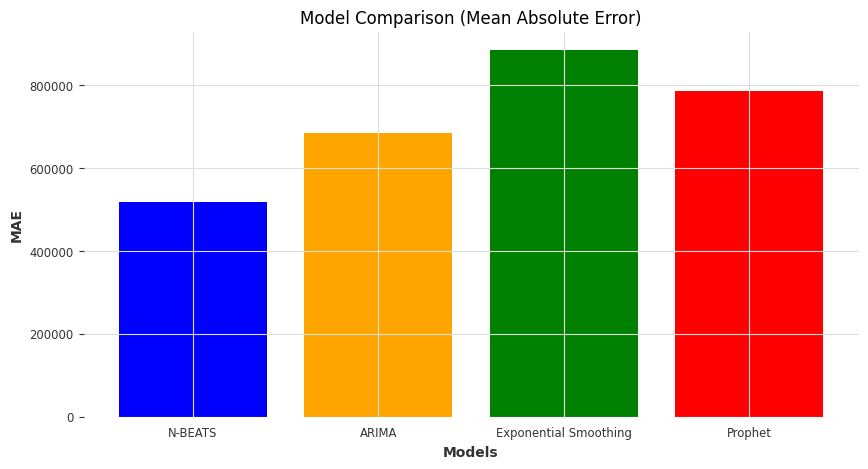

In [30]:
# Define MAE scores for models
model_mae = {
    "N-BEATS": 518355.039350696,
    "ARIMA": 684636.3900430576,
    "Exponential Smoothing": 885066.3551184495,
    "Prophet": 786514.2046682882
}

# Bar plot of MAE scores
plt.figure(figsize=(10, 5))
plt.bar(model_mae.keys(), model_mae.values(), color=["blue", "orange", "green", "red"])
plt.title("Model Comparison (Mean Absolute Error)")
plt.ylabel("MAE")
plt.xlabel("Models")
plt.show()
